# Mengimport libary yang diperlukan

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Preprocessing Data

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/financial_stability_dataset.csv')
df

,Monthly Income (k$),Monthly Expenses (k$),Savings (k$),Debt (k$),Credit Score,Age,Education,Number of Dependents,Transaction Frequency (transactions/month)
0,301.381886,32.973187,110.822563,248.429859,689,33,High School,4,13
1,87.509803,20.725693,61.192659,147.949023,306,20,Elementary,2,9
2,542.820989,68.495979,180.075334,409.147509,528,36,Elementary,0,10
3,909.769803,771.107937,713.257583,102.750161,308,26,Associate,3,7
4,534.125605,522.050836,1481.054600,473.567688,306,58,Associate,2,8
...,...,...,...,...,...,...,...,...,...
1321,809.705587,251.646476,2513.812144,63.932551,472,33,Associate,4,15
1322,1005.771615,52.908043,824.789126,15.252934,678,67,High School,2,6
1323,543.301474,454.450959,198.984108,136.711258,403,38,Bachelor,4,7
1324,109.968097,2065.149776,1467.762626,36.475778,323,62,Elementary,4,11


In [73]:
df.isnull().sum()

Monthly Income (k$)                           0
Monthly Expenses (k$)                         0
Savings (k$)                                  0
Debt (k$)                                     0
Credit Score                                  0
Age                                           0
Education                                     0
Number of Dependents                          0
Transaction Frequency (transactions/month)    0
dtype: int64

In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly Income (k$),1326.0,439.050143,541.054099,11.014818,132.134073,266.802334,542.693131,6412.427258
Monthly Expenses (k$),1326.0,375.042897,595.744446,8.342844,109.886010,220.984162,430.510625,10687.009510
Savings (k$),1326.0,938.605792,1669.176104,7.125673,191.896787,451.389207,1022.403236,30026.352065
Debt (k$),1326.0,388.300896,779.555339,3.240071,68.414493,175.734523,405.215771,10375.800484
Credit Score,1326.0,534.500754,148.099022,300.000000,413.000000,520.000000,637.000000,849.000000
Age,1326.0,42.758673,14.741618,18.000000,30.000000,42.000000,55.750000,69.000000
Number of Dependents,1326.0,2.044495,1.399292,0.000000,1.000000,2.000000,3.000000,4.000000
Transaction Frequency (transactions/month),1326.0,9.969834,3.148979,2.000000,8.000000,10.000000,12.000000,21.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Monthly Income (k$)                         1326 non-null   float64
 1   Monthly Expenses (k$)                       1326 non-null   float64
 2   Savings (k$)                                1326 non-null   float64
 3   Debt (k$)                                   1326 non-null   float64
 4   Credit Score                                1326 non-null   int64  
 5   Age                                         1326 non-null   int64  
 6   Education                                   1326 non-null   object 
 7   Number of Dependents                        1326 non-null   int64  
 8   Transaction Frequency (transactions/month)  1326 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 93.4+ KB


<ipython-input-76-c035770a5202>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["Education"], palette= cols)
<ipython-input-76-c035770a5202>:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x= df["Education"], palette= cols)


<Axes: xlabel='Education', ylabel='count'>

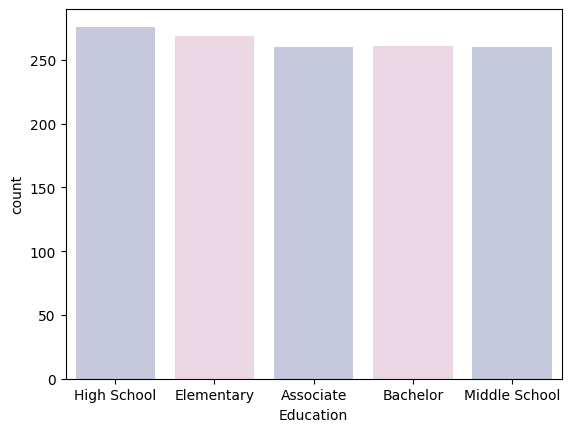

In [76]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df["Education"], palette= cols)

In [77]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df

,Monthly Income (k$),Monthly Expenses (k$),Savings (k$),Debt (k$),Credit Score,Age,Education,Number of Dependents,Transaction Frequency (transactions/month)
0,301.381886,32.973187,110.822563,248.429859,689,33,3,4,13
1,87.509803,20.725693,61.192659,147.949023,306,20,2,2,9
2,542.820989,68.495979,180.075334,409.147509,528,36,2,0,10
3,909.769803,771.107937,713.257583,102.750161,308,26,0,3,7
4,534.125605,522.050836,1481.054600,473.567688,306,58,0,2,8
...,...,...,...,...,...,...,...,...,...
1321,809.705587,251.646476,2513.812144,63.932551,472,33,0,4,15
1322,1005.771615,52.908043,824.789126,15.252934,678,67,3,2,6
1323,543.301474,454.450959,198.984108,136.711258,403,38,1,4,7
1324,109.968097,2065.149776,1467.762626,36.475778,323,62,2,4,11


In [78]:
# # Correlation amongst numeric attributes
# corrmat = df.corr()
# cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
# plt.subplots(figsize=(18,18))
# sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Disini saya menggunakan Algoritma Agglomorative Clustering untuk mengelompokan sebuah data karena untuk agglomorative ini sangat jelas dalam menampilkan sebuah cluster apakah cluster itu mempunyai sebuah outlier atau tidaknya

In [79]:
data_scaler= StandardScaler()
scaled_data = data_scaler.fit_transform(df)

# Modeling Data

In [80]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

In [81]:
def plot_dendrogram(clusters):
  plt.figure(figsize=(20,6))
  dendrogram(clusters,orientation="top", leaf_font_size=9, leaf_rotation=360)
  plt.ylabel('Euclidean Distance')

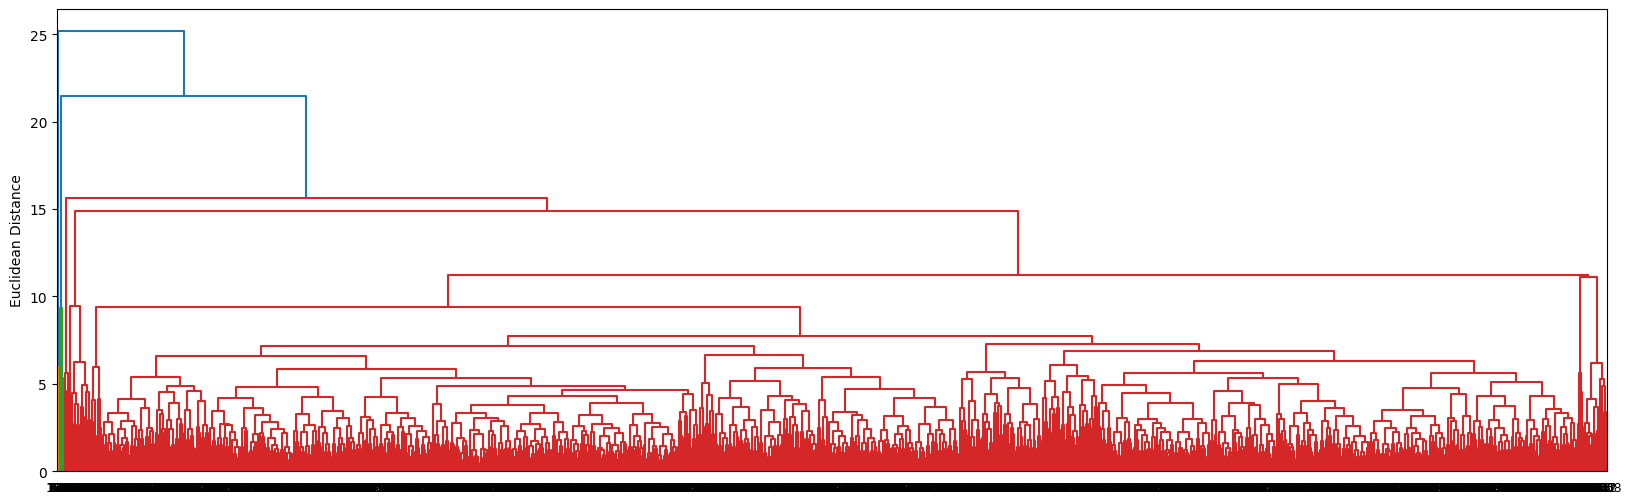

In [82]:
plot_dendrogram(complete_clustering)

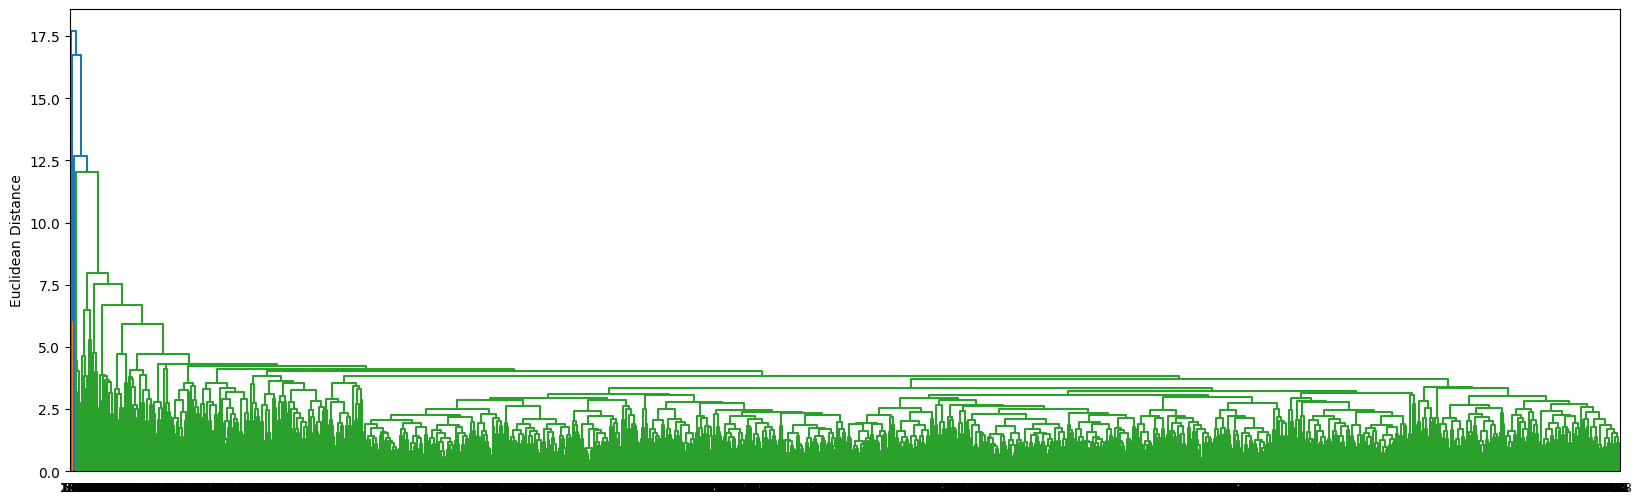

In [83]:
plot_dendrogram(average_clustering)

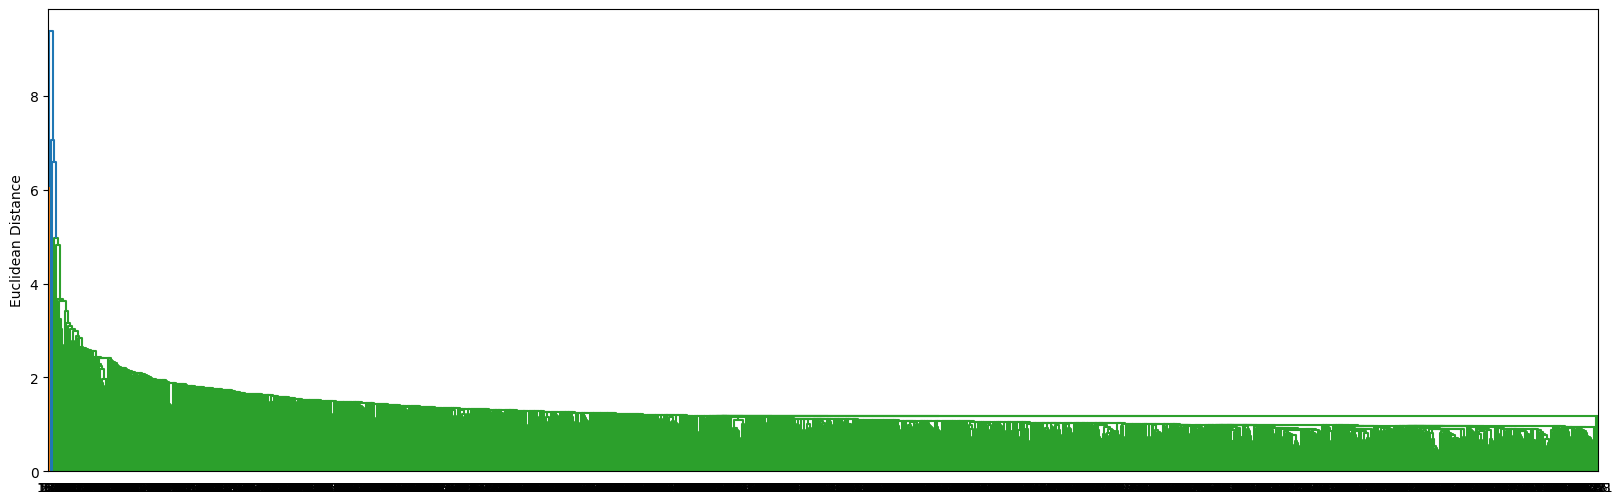

In [84]:
plot_dendrogram(single_clustering)

In [85]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean").fit(scaled_data)
label = model.labels_
label

array([1, 0, 1, ..., 0, 1, 0])

# Hasil Akurasi

In [87]:
ss = silhouette_score(df,label)
print(f"Silhoutte score yang didapat adalah : {ss}")

Silhoutte score yang didapat adalah : 0.011009877700038393


In [90]:
sc = calinski_harabasz_score(df,label)
print(f"Caliski score yang didapat adalah :{sc}")

Caliski score yang didapat adalah :41.949997454688116


In [92]:
sd = davies_bouldin_score(df,label)
print(f"Davies score yang didapat adalah :{sd}")

Davies score yang didapat adalah :3.403914758197756


Dapat disimpulkan akurasi diatas bahwa data diatas dipreprocessing dengan baik dan juga dataset yang mudah tidak ada nilai NaN nya sehingga data diatas dapat dikategorikan baik